In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# logs-1.jpg

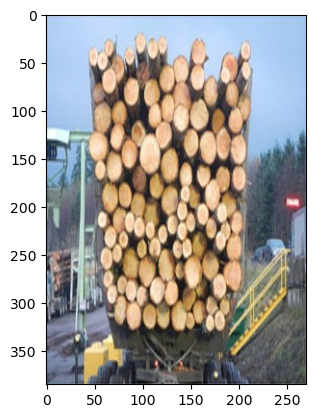

In [9]:
img = cv.imread("logs-1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

Чтобы обнаружить окружности на изображении, его необходимо растянуть по оси x.

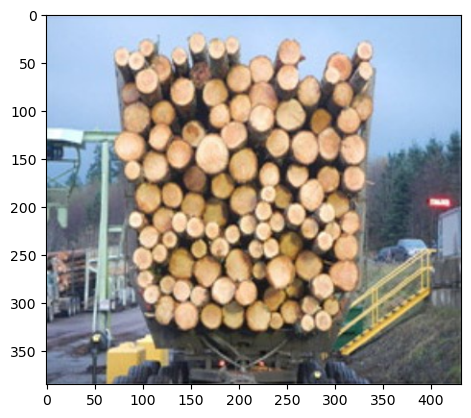

In [274]:
img = cv.resize(img, None, fx=1.6, fy=1)
plt.imshow(img)

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))

In [320]:
big_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT_ALT,
                   2,
                   10,
                   param1 = 150,
                   param2 = 0.65,
                   minRadius = 10, maxRadius = 19)

In [412]:
small_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT_ALT,
                   1.5,
                   4,
                   param1 = 100,
                   param2 = 0.68,
                   minRadius = 2, maxRadius = 12)

In [469]:
def draw_circles(img, circle_list, color_list):
    img_circles = img.copy()
    circles_count = 0
    circle_centers = None
    for i, (circles, color) in enumerate(zip(circle_list, color_list)):
        if circles is not None:
            circles = np.uint16(np.around(circles))

            for points in circles[0, :]:
                a, b, r = points[0], points[1], points[2]
                
                if circle_centers is None or np.all(((circle_centers[:, 0] - a)**2 + (circle_centers[:, 1] - b)**2 > r**2)):
                    cv.circle(img_circles, (a, b), r, color, 2)
                    cv.circle(img_circles, (a, b), 1, (255, 0, 0), 3)
                    circles_count += 1
                    
            if i == 0:
                circle_centers = np.array(circles[0, :, 0:2])
            else:
                circle_centers = np.concatenate([circle_centers, circles[0, :, 0:2]], axis=0)
    
    print("Total circles: ", circles_count)
    plt.imshow(img_circles)

Total circles:  92
0


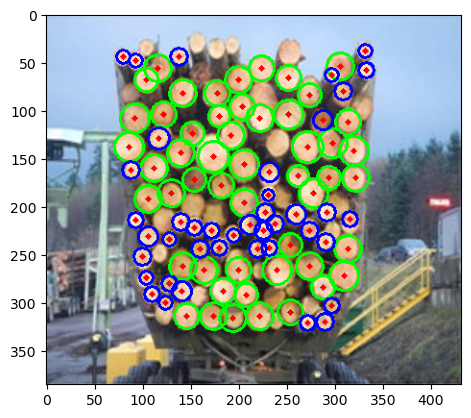

In [468]:
circle_list= [big_circles, small_circles]
color_list = [(0, 255, 0), (0, 0, 255)]
draw_circles(img, circle_list, color_list)

## logs-2.jpg

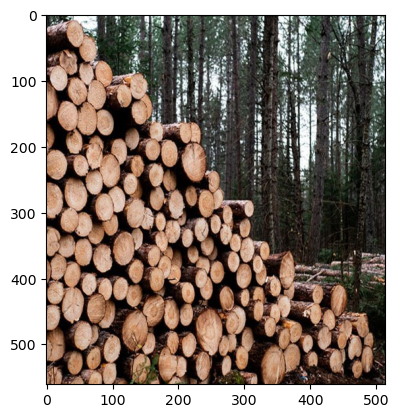

In [490]:
img = cv.imread("logs-2.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

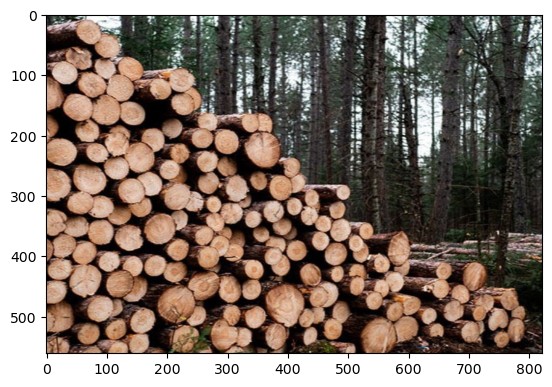

In [491]:
img = cv.resize(img, None, fx=1.6, fy=1)
plt.imshow(img)

In [492]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))

In [525]:
big_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT_ALT,
                   1,
                   15,
                   param1 = 200,
                   param2 = 0.8,
                   minRadius = 20, maxRadius = 40)

In [605]:
mid_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT_ALT,
                   1.5,
                   15,
                   param1 = 100,
                   param2 = 0.5,
                   minRadius = 15, maxRadius = 30)

## Малые окружности

In [590]:
small_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT_ALT,
                   1,
                   10,
                   param1 = 180,
                   param2 = 0.65,
                   minRadius = 10, maxRadius = 20)

Total circles:  120


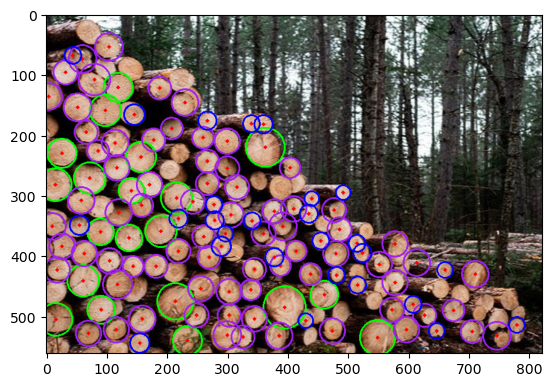

In [606]:
circle_list= [big_circles, mid_circles, small_circles]
color_list = [(0, 255, 0), (160, 32, 240), (0, 0, 255)]
draw_circles(img, circle_list, color_list)

# pipes-4.jpg

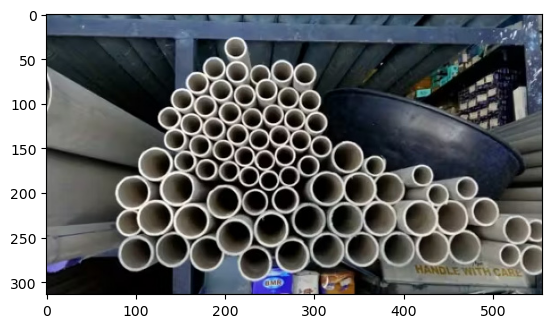

In [607]:
img = cv.imread("pipes-4.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [608]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))

In [624]:
detected_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT_ALT,
                   1.5,
                   10,
                   param1 = 220,
                   param2 = 0.8,
                   minRadius = 5, maxRadius = 25)

Total pipes:  78


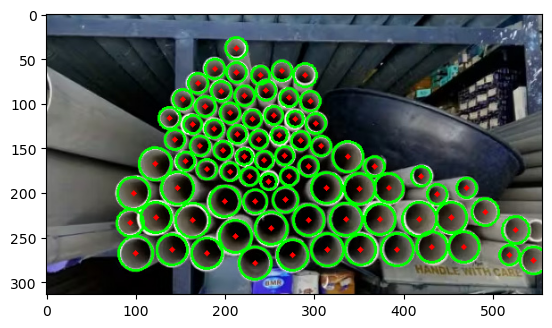

In [625]:
img_circles = img.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(img_circles, (a, b), r, (0, 255, 0), 2)

        cv.circle(img_circles, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total pipes: ", pipes_count)
plt.imshow(img_circles)

# pipes-5.jpg

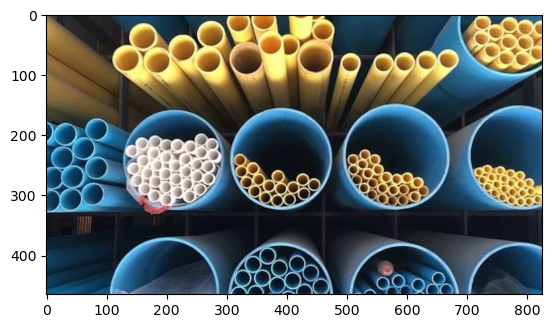

In [834]:
img = cv.imread("pipes-5.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [835]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))

In [836]:
large_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1.5,  
                   170,
                   param1 = 250, 
                   param2 = 40,
                   minRadius = 70, maxRadius = 90)

In [851]:
big_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1.5,
                   22,
                   param1 = 250, 
                   param2 = 48,
                   minRadius = 12, maxRadius = 28)

In [853]:
mid_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   2,  
                   12,
                   param1 = 100,
                   param2 = 32, 
                   minRadius = 8, maxRadius = 12)

In [839]:
small_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1,  
                   5, 
                   param1 = 100, 
                   param2 = 13, 
                   minRadius = 3, maxRadius = 7)

Total circles:  150


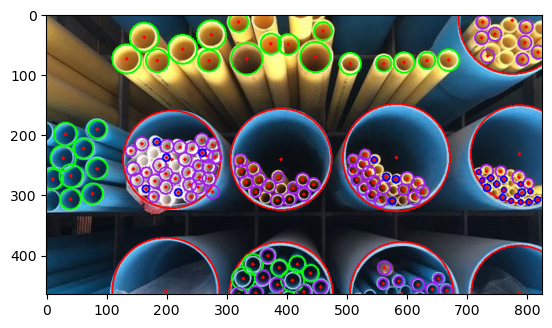

In [854]:
circle_list= [large_circles, big_circles, mid_circles, small_circles]
color_list = [(255, 0, 0), (0, 255, 0), (160, 32, 240), (0, 0, 255)]
draw_circles(img, circle_list, color_list)

# pipes-6.jpg

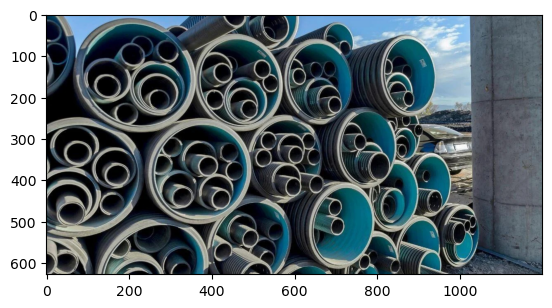

In [855]:
img = cv.imread("pipes-6.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [856]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))

In [963]:
large_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1.5,  
                   180,
                   param1 = 250,
                   param2 = 40, 
                   minRadius = 100, maxRadius = 120)

In [964]:
big_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1.5,  
                   90,
                   param1 = 250,
                   param2 = 100, 
                   minRadius = 50, maxRadius = 70)

In [965]:
mid_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1.5,  
                   40,
                   param1 = 200,
                   param2 = 44, 
                   minRadius = 30, maxRadius = 45)

In [966]:
small_circles = cv.HoughCircles(gray,
                   cv.HOUGH_GRADIENT,
                   1.5,  
                   25,
                   param1 = 100,
                   param2 = 44, 
                   minRadius = 15, maxRadius = 25)

In [967]:
def draw_circles(img, circle_list, color_list):
    img_circles = img.copy()
    circles_count = 0
    for i, (circles, color) in enumerate(zip(circle_list, color_list)):
        if circles is not None:
            circles = np.uint16(np.around(circles))

            for points in circles[0, :]:
                a, b, r = points[0], points[1], points[2]
                
                cv.circle(img_circles, (a, b), r, color, 2)
                cv.circle(img_circles, (a, b), 1, (255, 0, 0), 3)
                circles_count += 1
    
    print("Total circles: ", circles_count)
    plt.imshow(img_circles)

Total circles:  121


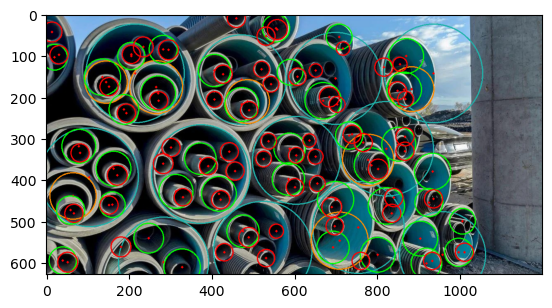

In [969]:
circle_list= [large_circles, big_circles, mid_circles, small_circles]
color_list = [(32, 178, 170), (255, 140, 0), (0, 255, 0), (255, 0, 0)]
draw_circles(img, circle_list, color_list)